# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | mota del cuervo
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | recani
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | along
Processing Record 12 of Set 1 | pariaman
Processing Record 13 of Set 1 | kalemie
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | berbera
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | lac-brome
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | tweed heads
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,288.83,95,100,6.44,NZ,1737683980
1,mota del cuervo,39.5101,-2.8738,281.02,93,9,3.13,ES,1737683981
2,invercargill,-46.4000,168.3500,290.94,57,92,2.24,NZ,1737683982
3,recani,31.2846,-4.2688,283.75,30,0,1.44,MA,1737683983
4,ketchikan,55.3422,-131.6461,278.14,86,100,2.24,US,1737683984


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,288.83,95,100,6.44,NZ,1737683980
1,mota del cuervo,39.5101,-2.8738,281.02,93,9,3.13,ES,1737683981
2,invercargill,-46.4000,168.3500,290.94,57,92,2.24,NZ,1737683982
3,recani,31.2846,-4.2688,283.75,30,0,1.44,MA,1737683983
4,ketchikan,55.3422,-131.6461,278.14,86,100,2.24,US,1737683984


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

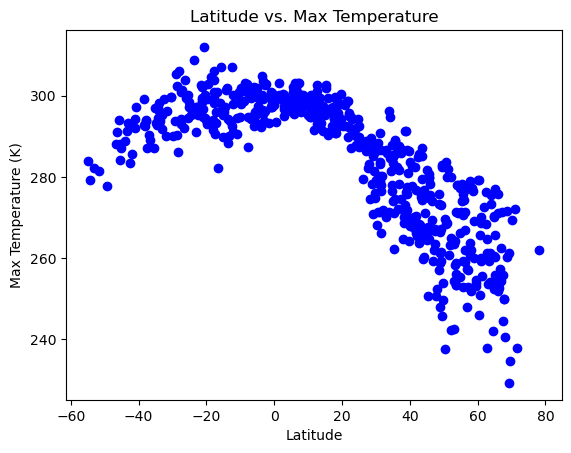

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="blue", edgecolors="blue")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

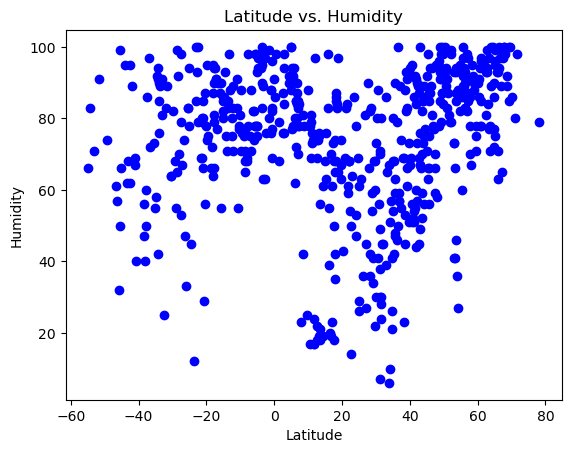

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="blue", edgecolors="blue")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

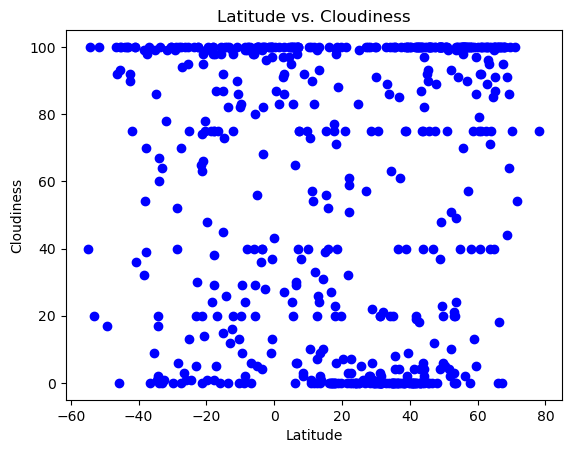

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", edgecolors="blue")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

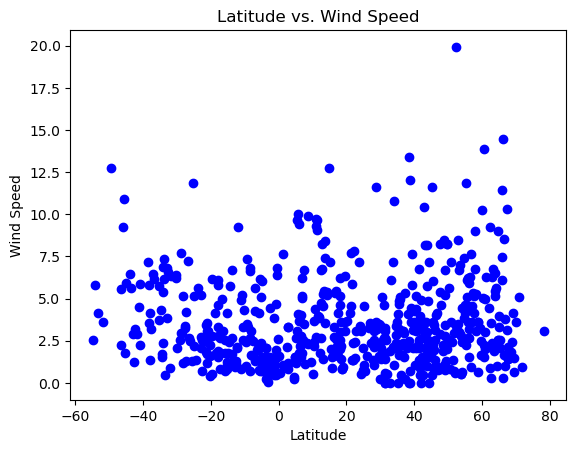

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="blue", edgecolors="blue")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress

def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, save_path, color="lightblue"):
    """
    Creates a scatter plot with a linear regression line.

    Parameters:
    x_data: Data for the x-axis.
    y_data: Data for the y-axis.
    x_label: Label for the x-axis.
    y_label: Label for the y-axis.
    title: Title of the plot.
    save_path: Path to save the plot as an image.
    color: Color for the scatter plot points. Default is "lightblue".
    """
    # Perform linear regression
    slope, intercept, r_value = linregress(x_data, y_data)

    # Generate the regression line
    regress_line = slope * x_data + intercept

    # Create the scatter plot
    plt.scatter(x_data, y_data, color=color, edgecolors="black", label="Data Points")

    # Plot the regression line
    plt.plot(x_data, regress_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")

    # Add labels, title, and legend
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # Add grid
    plt.grid(True)

    # Show the plot
    plt.show()


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mota del cuervo,39.5101,-2.8738,281.02,93,9,3.13,ES,1737683981
3,recani,31.2846,-4.2688,283.75,30,0,1.44,MA,1737683983
4,ketchikan,55.3422,-131.6461,278.14,86,100,2.24,US,1737683984
6,iqaluit,63.7506,-68.5145,254.00,71,40,5.14,CA,1737683986
10,along,28.1667,94.7667,286.82,82,100,1.05,IN,1737683991


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,288.83,95,100,6.44,NZ,1737683980
2,invercargill,-46.4000,168.3500,290.94,57,92,2.24,NZ,1737683982
5,puerto ayora,-0.7393,-90.3518,297.90,96,13,0.45,EC,1737683941
7,port-aux-francais,-49.3500,70.2167,277.70,74,17,12.72,TF,1737683987
8,pisco,-13.7000,-76.2167,294.18,83,0,6.69,PE,1737683988


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.73


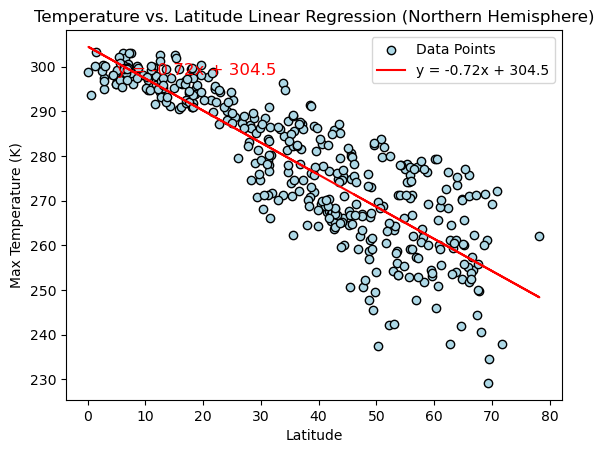

In [41]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)

# Calculate regression line values
regress_values = x_data * slope + intercept

# Create the plot
plt.scatter(x_data, y_data, color="lightblue", edgecolor="black", label="Data Points")
plt.plot(x_data, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_data) + 5, max(y_data) - 5),
             fontsize=12, color="red")

# Add labels, title, and legend
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("Temperature vs. Latitude Linear Regression (Northern Hemisphere)")
plt.legend()

# Display R-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# show the plot
plt.show()


The r-squared is: 0.25


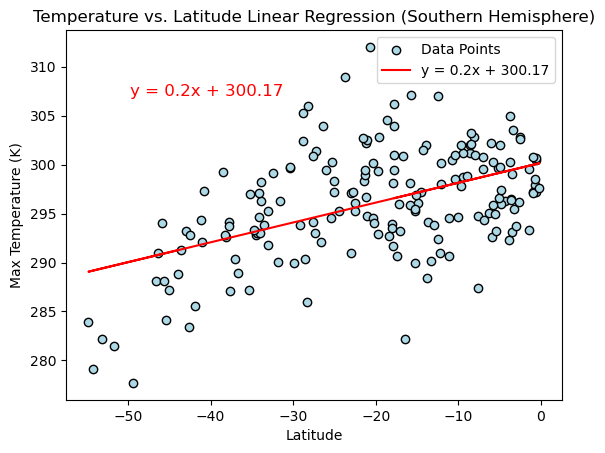

In [42]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)

# Calculate regression line values
regress_values = x_data * slope + intercept

# Create the plot
plt.scatter(x_data, y_data, color="lightblue", edgecolor="black", label="Data Points")
plt.plot(x_data, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_data) + 5, max(y_data) - 5),
             fontsize=12, color="red")

# Add labels, title, and legend
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("Temperature vs. Latitude Linear Regression (Southern Hemisphere)")
plt.legend()

# Display R-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# show the plot
plt.show()

**Discussion about the linear relationship:** The linear regression analysis of temperature versus latitude for both the Northern and Southern Hemispheres reveals interesting insights about the relationship between temperature and geographical position. Here's a detailed discussion based on the provided data: 

**Northern Hemisphere** (R-squared = 0.73, Slope = -0.72, Intercept = 304.5)

*Strong Negative Correlation*

The relatively high R-squared value of 0.73 indicates a strong linear relationship between latitude and temperature in the Northern Hemisphere.
The slope of -0.72 implies that for every 1-degree increase in latitude (moving closer to the poles), the maximum temperature decreases by 0.72 Kelvin.

*Temperature Trend*

The negative slope reflects the expected behavior: temperatures generally decrease as we move away from the equator toward the colder northern polar regions.

*Intercept*

The intercept of 304.5 suggests the expected temperature at 0° latitude (equator). While not exact, this aligns with the general understanding that the equatorial region experiences higher temperatures.

*Implications*
The stronger correlation in the Northern Hemisphere may be due to the larger landmass, which tends to have more pronounced temperature variations compared to oceanic regions.

**Southern Hemisphere** (R-squared = 0.25, Slope = 0.2, Intercept = 300.17)

*Weak Positive Correlation*

The R-squared value of 0.25 indicates a much weaker linear relationship between latitude and temperature in the Southern Hemisphere compared to the Northern Hemisphere.
The slope of 0.2 suggests that for every 1-degree increase in latitude (moving toward the South Pole), the maximum temperature increases slightly by 0.2 Kelvin.

*Intercept*

The intercept of 300.17 aligns with the temperature at 0° latitude, indicating that equatorial temperatures are still warm, albeit slightly cooler compared to the Northern Hemisphere.

*Implications*

The weak correlation may suggest that latitude alone is not a strong predictor of temperature in the Southern Hemisphere due to the moderating effects of oceans and smaller landmasses.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12


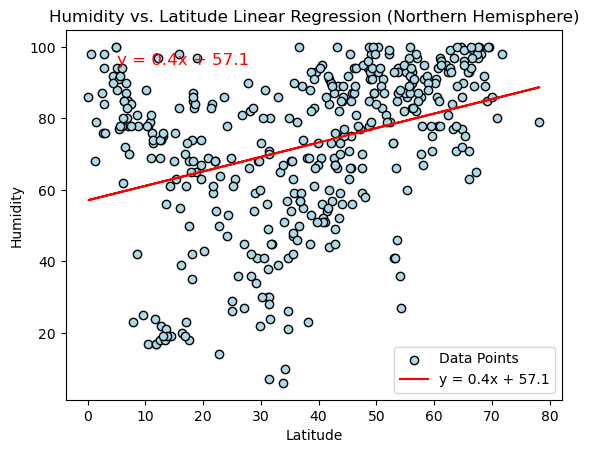

In [44]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)

# Calculate regression line values
regress_values = x_data * slope + intercept

# Create the plot
plt.scatter(x_data, y_data, color="lightblue", edgecolor="black", label="Data Points")
plt.plot(x_data, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_data) + 5, max(y_data) - 5),
             fontsize=12, color="red")

# Add labels, title, and legend
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude Linear Regression (Northern Hemisphere)")
plt.legend()

# Display R-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

#show the plot
plt.show()

The r-squared is: 0.10


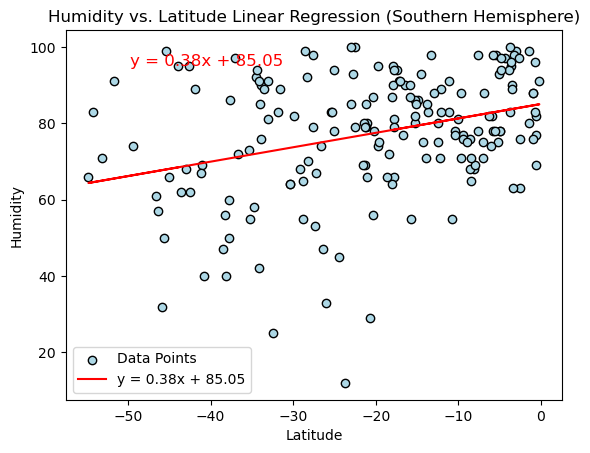

In [45]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)

# Calculate regression line values
regress_values = x_data * slope + intercept

# Create the plot
plt.scatter(x_data, y_data, color="lightblue", edgecolor="black", label="Data Points")
plt.plot(x_data, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_data) + 5, max(y_data) - 5),
             fontsize=12, color="red")

# Add labels, title, and legend
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude Linear Regression (Southern Hemisphere)")
plt.legend()

# Display R-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# show the plot

plt.show()

**Discussion about the linear relationship:** 

*Northern Hemisphere* (R-squared = 0.12, Slope = 0.4, Intercept = 57.1)

*Weak Positive Correlation*

The R-squared value of 0.12 indicates a weak linear relationship between latitude and humidity in the Northern Hemisphere.
The slope of 0.4 implies that for every 1-degree increase in latitude, the humidity increases by 0.4%.

*Intercept*

The intercept of 57.1 suggests the average humidity at the equator (latitude = 0°). This value is relatively low, likely due to the dominance of dry zones near the tropics in the Northern Hemisphere.

*Trend Implications*

While there is a slight upward trend, the low R-squared value indicates that latitude alone is not a strong predictor of humidity. 

*Southern Hemisphere* (R-squared = 0.10, Slope = 0.38, Intercept = 85.05)

*Very Weak Positive Correlation*

The R-squared value of 0.10 indicates an even weaker relationship between latitude and humidity in the Southern Hemisphere compared to the Northern Hemisphere.
The slope of 0.38 suggests a marginal increase in humidity with latitude.

*Intercept*

The intercept of 85.05 represents the average humidity at the equator for the Southern Hemisphere.

*Trend Implications*

Similar to the Northern Hemisphere, the weak correlation suggests that other variables are driving humidity variations, such as wind patterns, ocean currents, and regional climatic effects.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06


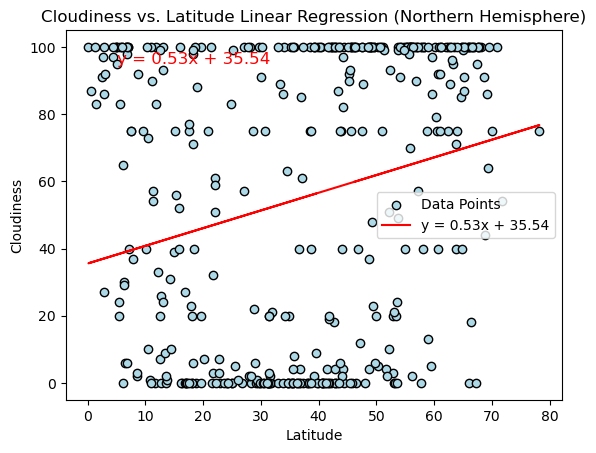

In [46]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)

# Calculate regression line values
regress_values = x_data * slope + intercept

# Create the plot
plt.scatter(x_data, y_data, color="lightblue", edgecolor="black", label="Data Points")
plt.plot(x_data, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_data) + 5, max(y_data) - 5),
             fontsize=12, color="red")

# Add labels, title, and legend
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)")
plt.legend()

# Display R-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# show the plot
plt.show()

The r-squared is: 0.00


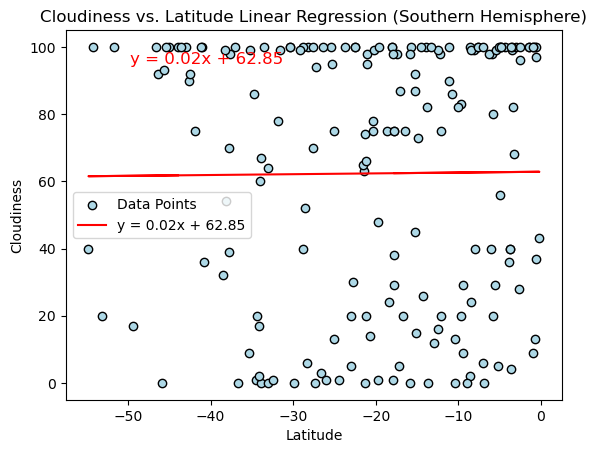

In [47]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)

# Calculate regression line values
regress_values = x_data * slope + intercept

# Create the plot
plt.scatter(x_data, y_data, color="lightblue", edgecolor="black", label="Data Points")
plt.plot(x_data, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_data) + 5, max(y_data) - 5),
             fontsize=12, color="red")

# Add labels, title, and legend
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)")
plt.legend()

# Display R-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The regression analysis indicates that there is no meaningful relationship between latitude and cloudiness in either hemisphere. The 𝑅-square values (0.06 for the Northern Hemisphere and 0.0 for the Southern Hemisphere) confirm that cloudiness is largely independent of latitude and is instead influenced by complex, localized meteorological and environmental factors. These findings emphasize the need to consider other variables, such as atmospheric circulation patterns and regional geography, to better understand cloudiness distributions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00


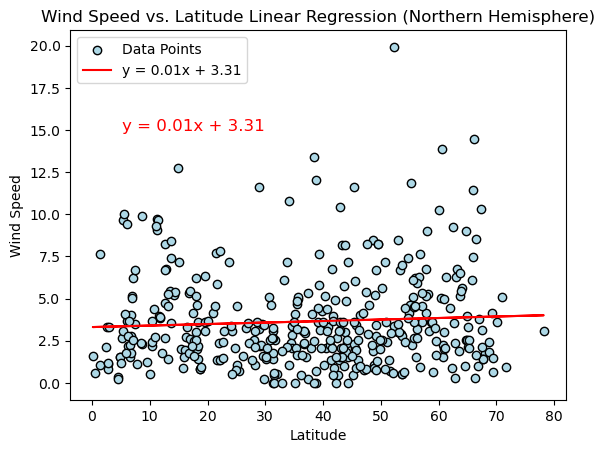

In [49]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)

# Calculate regression line values
regress_values = x_data * slope + intercept

# Create the plot
plt.scatter(x_data, y_data, color="lightblue", edgecolor="black", label="Data Points")
plt.plot(x_data, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_data) + 5, max(y_data) - 5),
             fontsize=12, color="red")

# Add labels, title, and legend
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)")
plt.legend()

# Display R-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r-squared is: 0.14


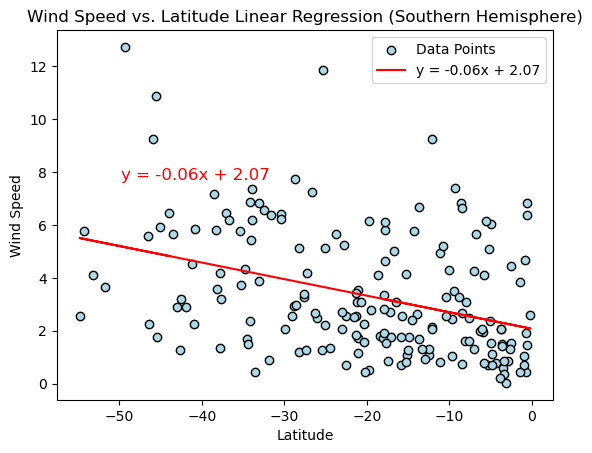

In [48]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)

# Calculate regression line values
regress_values = x_data * slope + intercept

# Create the plot
plt.scatter(x_data, y_data, color="lightblue", edgecolor="black", label="Data Points")
plt.plot(x_data, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_data) + 5, max(y_data) - 5),
             fontsize=12, color="red")

# Add labels, title, and legend
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)")
plt.legend()

# Display R-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The regression analysis for wind speed versus latitude reveals that latitude has little to no predictive power for wind speed in both hemispheres. In the Northern Hemisphere, the 𝑅-squared value of 0 confirms the lack of any linear relationship, while the Southern Hemisphere shows a very weak negative correlation, with only 14% of the variation explained by latitude. These results underscore that wind patterns are driven by much more complex and variable atmospheric processes than latitude alone.